# Plotting With Pandas

Visualizations are one of the most powerful tools at your disposal for exploring data and communicating data insights. The pandas library includes basic plotting capabilities that let you create a variety of plots from DataFrames. Plots in pandas are built on top of a popular Python plotting library called matplotlib, which comes with the Anaconda Python distribution.

Let's start by loading some packages, as well as a "Diamonds" data set which we'll use as a sample data set for plotting:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib

In [ ]:
diamonds = pd.read_csv("../input/diamonds/diamonds.csv")
diamonds = diamonds.drop("Unnamed: 0", axis=1)

print(diamonds.shape)        # Check data shape

diamonds.head(5)

(53940, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


The output shows that data set contains 10 features of 53940 different diamonds, including both numeric and categorical variables.

## Histograms

A histogram is a univariate plot (a plot that displays one variable) that groups a numeric variable into bins and displays the number of observations that fall within each bin. A histogram is a useful tool for getting a sense of the distribution of a numeric variable. Let's create a histogram of diamond carat weight with the df.hist() function:

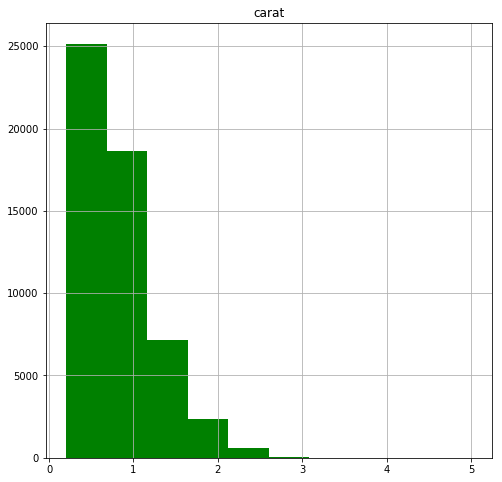

In [ ]:
diamonds.hist(column="carat",        # Column to plot
              figsize=(8,8),         # Plot size
              color="green");         # Plot color

We see immediately that the carat weights are positively skewed: most diamonds are around 1 carat or below but there are extreme cases of larger diamonds.

The plot above has fairly wide bins and there doesn't appear to be any data beyond a carat size of 3.5. We can make try to get more out of hour histogram by adding some additional arguments to control the size of the bins and limits of the x-axis:

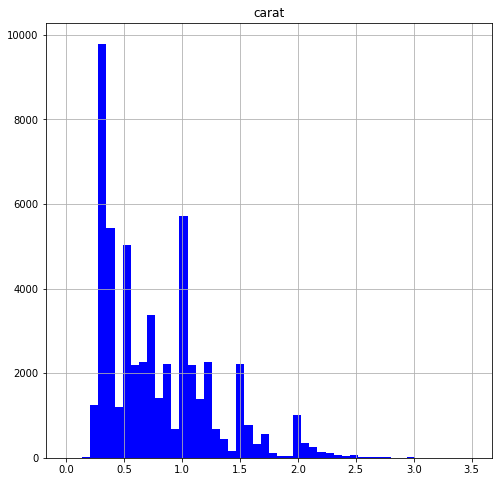

In [ ]:
diamonds.hist(column="carat",        # Column to plot
              figsize=(8,8),         # Plot size
              color="blue",          # Plot color
              bins=50,               # Use 50 bins
              range= (0,3.5));       # Limit x-axis range

This histogram gives us a better sense of some subtleties within the distribution, but we can't be sure that it contains all the data. Limiting the X-axis to 3.5 might have cut out some outliers with counts so small that they didn't show up as bars on our original chart. Let's check to see if any diamonds are larger than 3.5 carats:

In [ ]:
diamonds[diamonds["carat"] > 3.5]

,carat,cut,color,clarity,depth,table,price,x,y,z
23644,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
25999,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
26444,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31
26534,3.67,Premium,I,I1,62.4,56.0,16193,9.86,9.81,6.13
27130,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
27679,3.51,Premium,J,VS2,62.5,59.0,18701,9.66,9.63,6.03


It turns out that 9 diamonds are bigger than 3.5 carats. Should cutting these diamonds out concern us? On one hand, these outliers have very little bearing on the shape of the distribution. On the other hand, limiting the X-axis to 3.5 implies that no data lies beyond that point. For our own exploratory purposes this is not an issue but if we were to show this plot to someone else, it could be misleading. Including a note that 9 diamonds lie beyond the chart range could be helpful.

## Boxplots

Boxplots are another type of univariate plot for summarizing distributions of numeric data graphically. Let's make a boxplot of carat using the pd.boxplot() function:

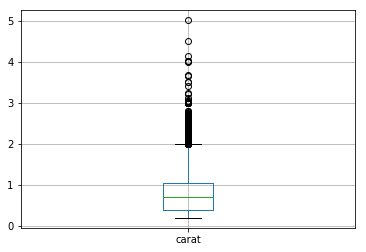

In [ ]:
diamonds.boxplot(column="carat");

As we learned in lesson 14, the central box of the boxplot represents the middle 50% of the observations, the central bar is the median and the bars at the end of the dotted lines (whiskers) encapsulate the great majority of the observations. Circles that lie beyond the end of the whiskers are data points that may be outliers.

In this case, our data set has over 50,000 observations and we see many data points beyond the top whisker. We probably wouldn't want to classify all of those points as outliers, but the handful of diamonds at 4 carats and above are definitely far outside the norm.

One of the most useful features of a boxplot is the ability to make side-by-side boxplots. A side-by-side boxplot takes a numeric variable and splits it on based on some categorical variable, drawing a different boxplot for each level of the categorical variable. Let's make a side-by-side boxplot of diamond price split by diamond clarity:

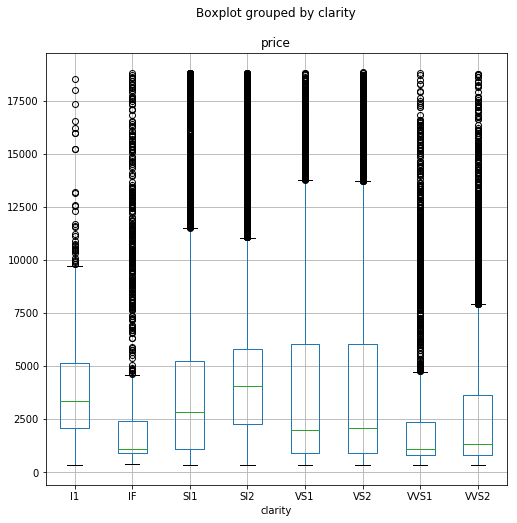

In [ ]:
diamonds.boxplot(column="price",        # Column to plot
                 by= "clarity",         # Column to split upon
                 figsize= (8,8));       # Figure size

The boxplot above is curious: we'd expect diamonds with better clarity to fetch higher prices and yet diamonds on the highest end of the clarity spectrum (IF = internally flawless) actually have lower median prices than low clarity diamonds! What gives? Perhaps another boxplot can shed some light on this situation:

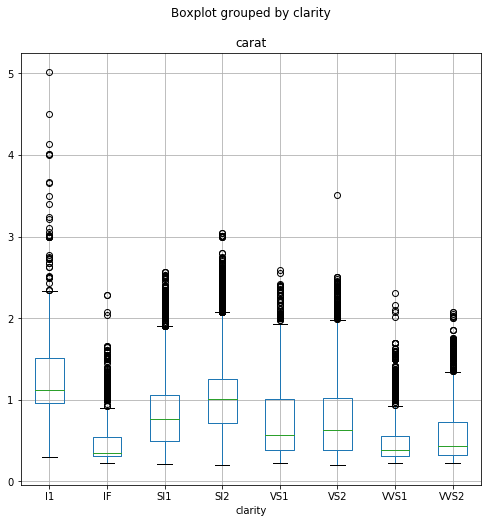

In [ ]:
diamonds.boxplot(column="carat",        # Column to plot
                 by= "clarity",         # Column to split upon
                 figsize= (8,8));       # Figure size

The plot above shows that diamonds with low clarity ratings also tend to be larger. Since size is an important factor in determining a diamond's value, it isn't too surprising that low clarity diamonds have higher median prices.

## Density Plots

A density plot shows the distribution of a numeric variable with a continuous curve. It is similar to a histogram but without discrete bins, a density plot gives a better picture of the underlying shape of a distribution. Create a density plot with series.plot(kind="density")

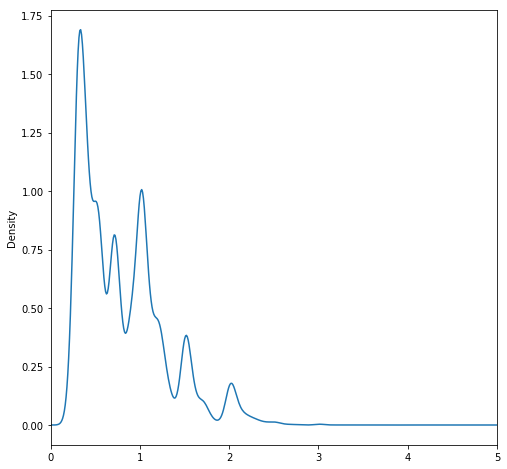

In [ ]:
diamonds["carat"].plot(kind="density",  # Create density plot
                      figsize=(8,8),    # Set figure size
                      xlim= (0,5));     # Limit x axis values

## Barplots

Barplots are graphs that visually display counts of categorical variables. We can create a barplot by creating a table of counts for a certain variable using the pd.crosstab() function and then passing the counts to df.plot(kind="bar"):

In [ ]:
carat_table = pd.crosstab(index=diamonds["clarity"], columns="count")
carat_table


col_0,count
clarity,
I1,741
IF,1790
SI1,13065
SI2,9194
VS1,8171
VS2,12258
VVS1,3655
VVS2,5066


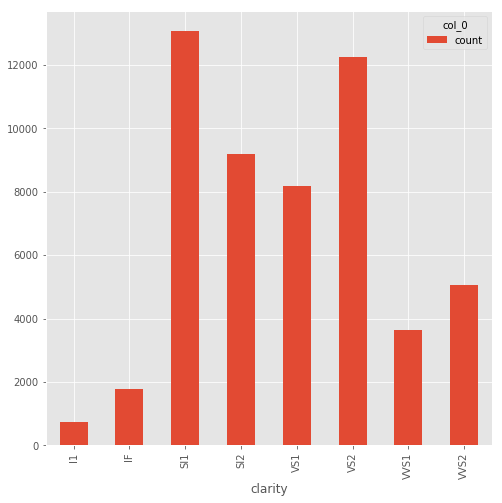

In [ ]:
carat_table.plot(kind="bar",
                 figsize=(8,8));

You can use a two dimensional table to create a stacked barplot. Stacked barplots show the distribution of a second categorical variable within each bar:

In [ ]:
carat_table = pd.crosstab(index=diamonds["clarity"],
                          columns=diamonds["color"])

carat_table

color,D,E,F,G,H,I,J
clarity,,,,,,,
I1,42,102,143,150,162,92,50
IF,73,158,385,681,299,143,51
SI1,2083,2426,2131,1976,2275,1424,750
SI2,1370,1713,1609,1548,1563,912,479
VS1,705,1281,1364,2148,1169,962,542
VS2,1697,2470,2201,2347,1643,1169,731
VVS1,252,656,734,999,585,355,74
VVS2,553,991,975,1443,608,365,131


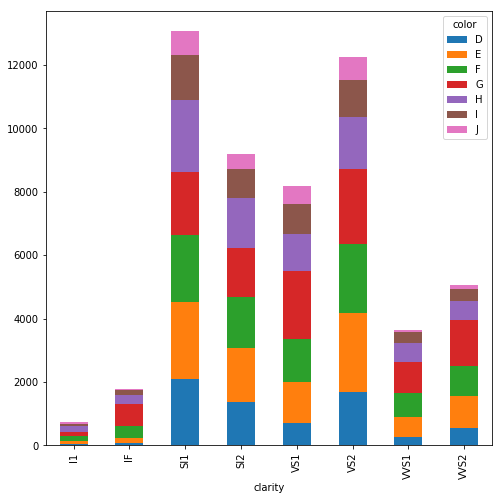

In [ ]:
carat_table.plot(kind="bar",
                 figsize=(8,8),
                 stacked=True);

A grouped barplot is an alternative to a stacked barplot that gives each stacked section its own bar. To make a grouped barplot, do not include the stacked argument (or set stacked=False):

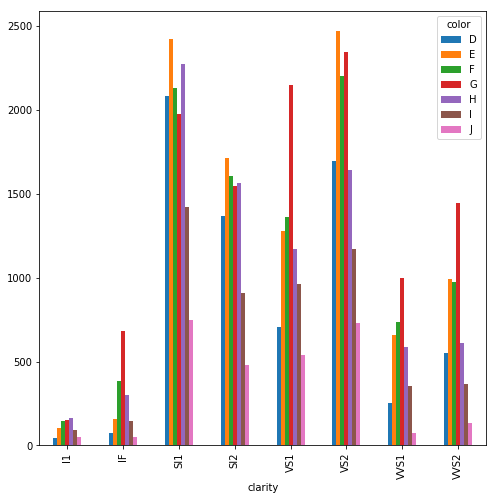

In [ ]:
carat_table.plot(kind="bar",
                 figsize=(8,8),
                 stacked=False);

## Scatterplots

Scatterplots are bivariate (two variable) plots that take two numeric variables and plot data points on the x/y plane. We saw an example of scatterplots in lesson 16 when we created a scatter plot matrix of the mtcars data set. To create a single scatterplot, use df.plot(kind="scatter"):

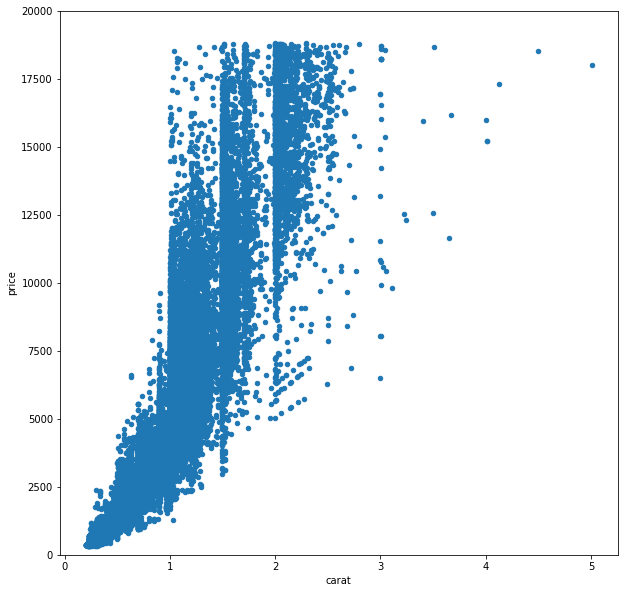

In [ ]:
diamonds.plot(kind="scatter",     # Create a scatterplot
              x="carat",          # Put carat on the x axis
              y="price",          # Put price on the y axis
              figsize=(10,10),
              ylim=(0,20000));

Although the scatterplot above has many overlapping points, it still gives us some insight into the relationship between diamond carat weight and price: bigger diamonds are generally more expensive.

## Line Plots

Line plots are charts used to show the change in a numeric variable based on some other ordered variable. Line plots are often used to plot time series data to show the evolution of a variable over time. Line plots are the default plot type when using df.plot() so you don't have to specify the kind argument when making a line plot in pandas. Let's create some fake time series data and plot it with a line plot:

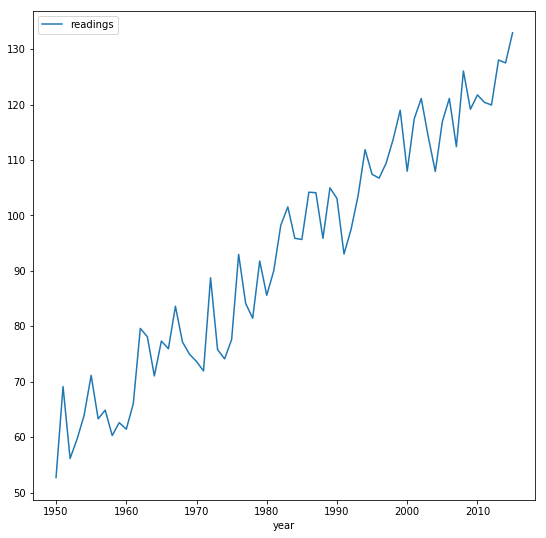

In [ ]:
# Create some data
years = [y for y in range(1950,2016)]

readings = [(y+np.random.uniform(0,20)-1900) for y in years]

time_df = pd.DataFrame({"year":years,
                        "readings":readings})

# Plot the data
time_df.plot(x="year",
             y="readings",
             figsize=(9,9));

## Saving Plots

If you want to save plots for later use, you can export the plot figure (plot information) to a file. First get the plot figure with plot.get_figure() and then save it to a file with figure.savefig("filename"). You can save plots to a variety of common image file formats, such as png, jpeg and pdf.

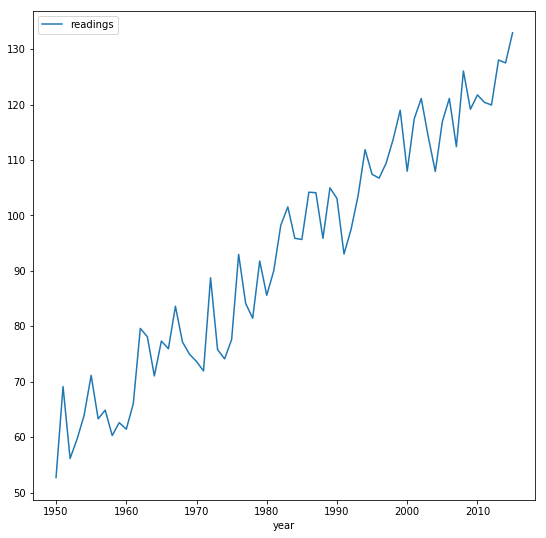

In [ ]:
my_plot = time_df.plot(x="year",     # Create the plot and save to a variable
             y="readings",
             figsize=(9,9))

my_fig = my_plot.get_figure()            # Get the figure

my_fig.savefig("line_plot_example.png")  # Save to file

## Wrap Up

The Python plotting ecosystem has many different libraries, which can make it confusing to know what to use and where to start. Pandas plotting functions let you visualize and explore data quickly. Pandas plotting functions don't offer all the features of dedicated plotting package like matplotlib for Python or ggplot2 for R, but they are often enough to get the job done.

Now that we have developed some tools to explore data, the remainder of this guide will focus on statistics and predictive modeling in Python